In [14]:
import numpy as np
import pagn.constants as ct
import matplotlib.pyplot as plt

#The purpose of this is to familiarise myself with some of the equations and get comfortable coding again
# I don't know if anything in here will be of any use in the future or if it is any good

In [131]:
def R_isco_function(MBH, spin):
    #function to calculate innermost stable circular orbit for a BH of given mass and spin
    R_G=ct.G*MBH*(1/(ct.c*ct.c))
    Z_1= 1 + ((1-(spin*spin))**(1/3)) * ((1+spin)**(1/3) + (1-spin)**(1/3))
    Z_2=(3*spin*spin + Z_1*Z_1)**(1/2)
    R_isco=R_G*(3+Z_2 - ((3-Z_1)*(3+Z_1+2*Z_2))**(1/2))
    # print(f'R_isco={R_isco}')
    return R_isco

# Radial fns for solving NT eqns in Eqn 99 Abramowicz and Fragile

def radial_fn_y0123(MBH, spin, R_isco):
    y0=(R_isco/MBH)**(1/2)
    y1=2*np.cos((np.arccos(spin)-np.pi)*(1/3))
    y2=2*np.cos((np.arccos(spin)+np.pi)*(1/3))
    y3=-2*np.cos((np.arccos(spin))*(1/3))
    return y0, y1, y2, y3

def radial_fn_Q(r, MBH, spin, y0, y1, y2, y3):
    y = (r/MBH)**(1/2)
    top= 1 + (spin * y**(-3))
    bottom= y * (1 - 3*y**(-2) +2*spin*y**(-3))**(1/2)
    Q0=top/bottom
    # Q0 = (1 + (spin * y**(-3)))/(y * (1 - (3 * y**(-3)) + (2 * spin * y**(-3)))**(1/2))
    term1a=3*(y1-spin)*(y1-spin)
    term1b1=(y-y1)/(y0-y1)
    print(f'y {y}, y0 {y0}, y1 {y1}')
    term1b=np.log(term1b1)
    term1c=y1*(y1-y2)*(y1-y3)
    term1=((term1a*term1b)/(term1c))
    term2=(3*(y2-spin)*(y2-spin))/(y2*(y2-y1)*(y2-y3)) * np.log((y-y2)/(y0-y2))
    term3=(3*(y3-spin)*(y3-spin))/(y3* (y3-y1)*(y3-y2)) * np.log((y-y3)/(y0-y3))
    #print(f'term 1a {term1a}, term 1b1 {term1b1}, term 1b {term1b}, term 1c {term1c}')
    Q = Q0 * (y - y0 - (3/2)*spin*np.log(y/y0) - term1 - term2 +term3) 
    return Q 

def radial_fn_AE(r, MBH, spin):
    y = (r/MBH)**(1/2)
    A = 1 + (spin*spin * y**(-4)) + (2 * spin*spin * y**(-6))
    B = 1 + (spin * y**(-3))
    C = 1 - (3 * y**(-2)) + (2 * spin * y**(-3))
    D = 1 - (2 * y**(-2)) + (spin*spin * y**(-4))
    E = 1 + (4 * spin*spin * y**(-4)) - (4 * spin*spin * y**(-6)) + (3 * spin*spin*spin*spin * y**(-8))
    return A,B,C,D,E

# surface profile eqn for NT disc

def surfacedensity_fn(r, MBH, spin, alpha, Mdot, y0, y1, y2, y3):
    rstar = (r * ct.c *ct.c) /(ct.G * MBH)
    mdot= Mdot * ct.c *ct.c
    A, B, C, D, E = radial_fn_AE(r, MBH, spin)
    Q = radial_fn_Q(r, MBH, spin, y0, y1, y2, y3)
    sigma = 5 * (1/alpha) * (1/mdot) * rstar**(3/2) * (1/(A*A)) * B*B*B * C**(1/2) * E * (1/Q)
    print(sigma)
    return sigma

In [133]:
MBH=1e8 * ct.MSun
M=MBH * ct.G /(ct.c*ct.c) # in units of Msol

#print(M)

spin=0.9
alpha=0.1
Mdot=0.1 #in terms of Ledd

Rmin= R_isco_function(MBH, spin)
Rmax=1e3*Rmin

# print(f'limits: {Rmin}, {Rmax}')

# print(np.sqrt(Rmin/M))

y0, y1, y2, y3 = radial_fn_y0123(M, spin, Rmin)
# print(y0, y1, y2, y3)

#print(Rmin/R_G)

R=np.linspace(Rmin, Rmax, 1000)
sigmas=[]
for r in R:
    sigma = surfacedensity_fn(r, M, spin, alpha, Mdot, y0, y1, y2, y3)
    sigmas.append(sigma)



y 1.5234444662568634, y0 1.5234444662568634, y1 1.2481404678253898
inf
y 2.154475825702697, y0 1.5234444662568634, y1 1.2481404678253898
-1.6304748877391125e+28
y 2.638683218066537, y0 1.5234444662568634, y1 1.2481404678253898
-4.289917107178108e+28
y 3.0468889325137267, y0 1.5234444662568634, y1 1.2481404678253898
-1.12763428122589e+29
y 3.406525386496231, y0 1.5234444662568634, y1 1.2481404678253898
-3.975698544013455e+29
y 3.73166159379598, y0 1.5234444662568634, y1 1.2481404678253898
1.761590187801069e+30
y 4.030655193933192, y0 1.5234444662568634, y1 1.2481404678253898
4.655247494900515e+29
y 4.308951651405394, y0 1.5234444662568634, y1 1.2481404678253898
3.36371867027632e+29
y 4.57033339877059, y0 1.5234444662568634, y1 1.2481404678253898
2.947637645802233e+29
y 4.817554402151219, y0 1.5234444662568634, y1 1.2481404678253898
2.7893741166935307e+29
y 5.052693683517263, y0 1.5234444662568634, y1 1.2481404678253898
2.7424792997989783e+29
y 5.277366436133074, y0 1.5234444662568634, y

/var/folders/p3/zq_xf6g554d28rrxhsngpp_00000gr/T/ipykernel_14066/4222871026.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = 5 * (1/alpha) * (1/mdot) * rstar**(3/2) * (1/(A*A)) * B*B*B * C**(1/2) * E * (1/Q)


Text(0, 0.5, 'Surface Density')

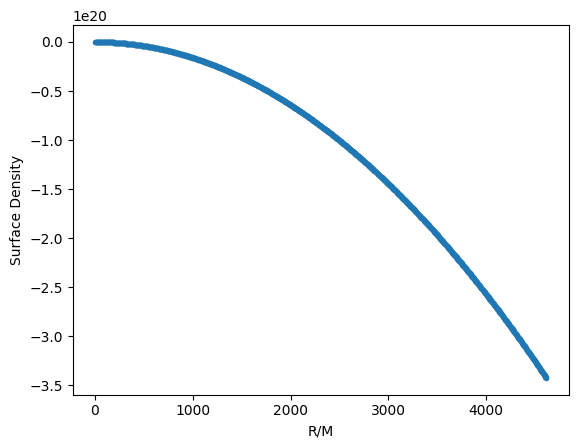

In [86]:
plt.plot(R/M, sigmas, '.')
plt.xlabel("R/M")
plt.ylabel("Surface Density")

Text(0, 0.5, 'R_isco (6R_g)')

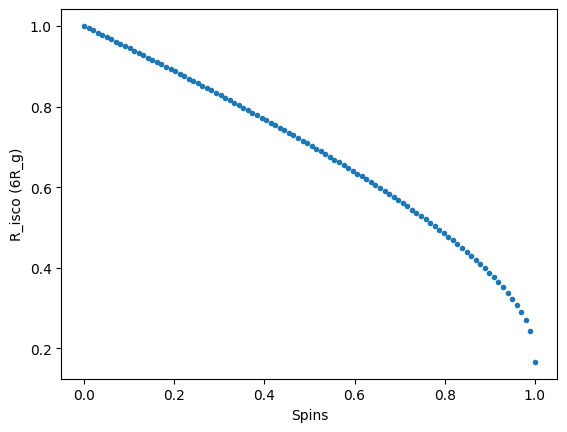

In [48]:
M=10**8*ct.MSun
#spins=0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98,0.99, 0.999, 0.9999
spins=np.linspace(0, 1, 100)
R_iscos=[]
for spin in spins:
    R_isco=R_isco_function(M, spin)
    R_iscos.append((R_isco/(6*ct.G*M*(1/(ct.c*ct.c)))))

plt.plot(spins, R_iscos, '.')
plt.xlabel("Spins")
plt.ylabel("R_isco (6R_g)")
#plt.yscale('log')

In [186]:
MBH=1e8 * ct.MSun
M=MBH * ct.G /(ct.c*ct.c) # in units of Msol
print(MBH)
spin=0.9
alpha=0.01
eps=0.1
Mdot=0.1 #in terms of Ledd

R_G=ct.G*MBH*(1/(ct.c*ct.c))
print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmin_2 = R_G / (2 * eps) #used in pagn SirkoAGN to set inner edge of disc
Rmax=1e3*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

print(f'Including Relativity R_min = {Rmin/R_G} R_G')
print(f'Excluding Relativity R_min = {Rmin_2/R_G} R_G')

R=np.linspace(Rmin, Rmax, 1000000)
for r in R:
    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c
    if vc<0.1:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        break


1.98847e+38
R_G = 147666969103.34393 m
Including Relativity R_min = 2.320883041761887 R_G
Excluding Relativity R_min = 5.0 R_G
disk stops being relativistic at 100.00075002565912 R_G


In [220]:
# Attempt 2 at coding Eqns 99 from Abraowicz and Fragile
MBH=1e8 * ct.MSun
spin=0.9
alpha=0.01
eps=0.1
Mdot=0.1 #in terms of Ledd

mdot=Mdot*ct.c*ct.c

M=MBH * ct.G /(ct.c*ct.c) 
m=M/ct.MSun

R_G=ct.G*MBH*(1/(ct.c*ct.c))
# print(f'R_G = {R_G} m')

Rmin= R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmax=1e3*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

r_isco=R_isco_function(MBH, spin)

y0=np.sqrt(r_isco/M)
y1=2*np.cos((np.arccos(spin)-np.pi)*(1/3))
y2=2*np.cos((np.arccos(spin)+np.pi)*(1/3))
y3=-2*np.cos((np.arccos(spin))*(1/3))


# print(f'Including Relativity R_min = {Rmin/R_G} R_G')

R=np.linspace(Rmin, Rmax, 10000)

sigmas=[]
Rs=[]

for i in range(1,10000):
    r=R[i]
    y=np.sqrt(r/M)
    rstar=(r*ct.c*ct.c)/(ct.G*M)

    A = 1 + (spin*spin * y**(-4)) + (2 * spin*spin * y**(-6))
    B = 1 + (spin * y**(-3))
    C = 1 - (3 * y**(-2)) + (2 * spin * y**(-3))
    D = 1 - (2 * y**(-2)) + (spin*spin * y**(-4))
    E = 1 + (4 * spin*spin * y**(-4)) - (4 * spin*spin * y**(-6)) + (3 * spin*spin*spin*spin * y**(-8))
    
    top = 1 + (spin * y**(-3))
    bottom = y * (1 - 3*y**(-2) +2*spin*y**(-3))**(1/2)
    Q0 = top/bottom
    
    term1a=3*(y1-spin)*(y1-spin)

    term1b1=(y-y1)/(y0-y1)

    term1b=np.log(term1b1)
    term1c=y1*(y1-y2)*(y1-y3)
    term1=((term1a*term1b)/(term1c))
    term2=(3*(y2-spin)*(y2-spin))/(y2*(y2-y1)*(y2-y3)) * np.log((y-y2)/(y0-y2))
    term3=(3*(y3-spin)*(y3-spin))/(y3* (y3-y1)*(y3-y2)) * np.log((y-y3)/(y0-y3))
    #print(f'term 1a {term1a}, term 1b1 {term1b1}, term 1b {term1b}, term 1c {term1c}')
    Q = Q0 * (y - y0 - (3/2)*spin*np.log(y/y0) - term1 - term2 +term3) 

    sigma = 5 * (1/alpha) * (1/mdot) * rstar**(3/2) * (1/(A*A)) * B*B*B * C**(1/2) * E * (1/Q)
    sigmas.append(sigma)
    Rs.append(r/M)
    # print(f'Surfacy Density Profile {sigma}')

    v=np.sqrt(ct.G * MBH / (r*r*r)) * r
    vc=v/ct.c

    if vc<0.1:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        break




disk stops being relativistic at 100.00343684735398 R_G


Text(0, 0.5, 'Surface Density')

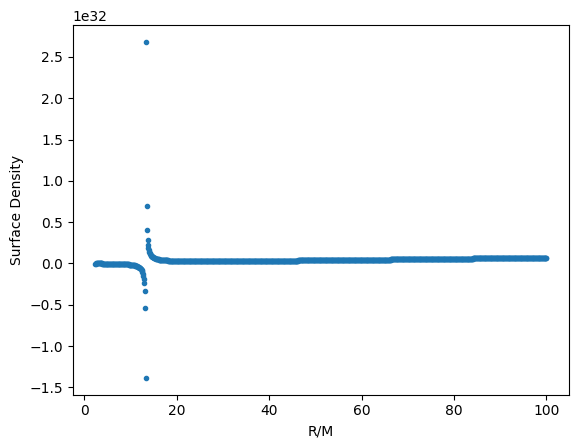

In [222]:
plt.plot(Rs, sigmas, '.')
plt.xlabel("R/M")
plt.ylabel("Surface Density")
# plt.xlim(0.1e13, 1.6e13)
# plt.ylim(0, 0.23e32)